In [1]:
# 5/26
import pandas as pd
import numpy as np
# 파일 저장및 불러오기 모듈
import bz2
import pickle
import _pickle as cPickle

In [2]:
# 다시 불러오기
def decompress_pickle(file):
    data = bz2.BZ2File(file, 'rb')
    data = cPickle.load(data)
    return data
train1 = decompress_pickle('texi_train/3train1_1.pbz2')
# train1 = pd.read_csv("texi_train/1train1_1.csv")
df = train1

In [11]:
df.head()

,index,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
2,2,5.7,2011-08-18 00:35:00+00:00,-73.982735,40.761269,-73.991241,40.750561
5,5,12.1,2011-01-06 09:50:00+00:00,-74.000961,40.731628,-73.972893,40.758232
8,8,9.0,2012-12-03 13:10:00+00:00,-74.006462,40.726711,-73.993080,40.731628
11,11,5.5,2012-12-24 11:24:00+00:00,0.000000,0.000000,0.000000,0.000000
14,14,7.7,2011-04-05 17:11:00+00:00,-74.001823,40.737549,-73.998062,40.722790


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18408279 entries, 0 to 18408278
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   index              int64  
 2   fare_amount        float64
 3   pickup_datetime    object 
 4   pickup_longitude   float64
 5   pickup_latitude    float64
 6   dropoff_longitude  float64
 7   dropoff_latitude   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 1.1+ GB


In [5]:
# df = df.drop("Unnamed: 0", axis=1)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

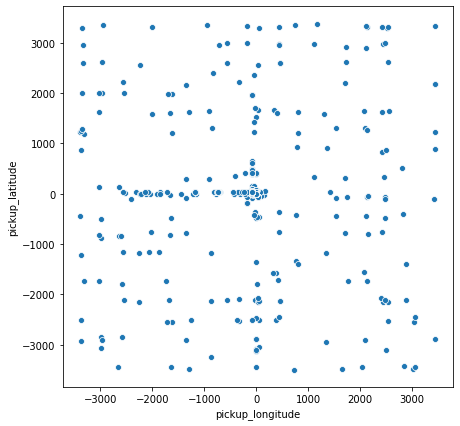

In [6]:

# 탑승 좌표 데이터 그래프 플랏 결과 좌표 데이터의 이상치가 시각적으로 필터링 하기엔 너무 넓게 퍼진것을 확인
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x="pickup_longitude", y="pickup_latitude")

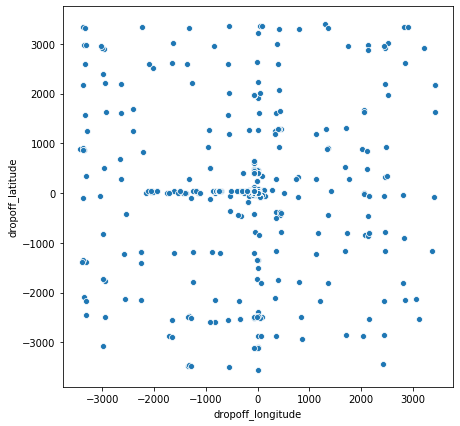

In [5]:
#하차 좌표
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x="dropoff_longitude", y="dropoff_latitude")

In [6]:
# 3. 플랏결과 이상치가 너무 넓게 분포함을 확인하고 실제 뉴욕 좌표범위를 바탕으로 필터링
left_end = -74.28
right_end = -73.67
top_end = 40.93
bottom_end = 40.48
df = df[(df["pickup_longitude"] <right_end) & (df["pickup_longitude"] > left_end)]
df = df[(df["dropoff_longitude"] <right_end) & (df["dropoff_longitude"] > left_end)]
df = df[(df["pickup_latitude"] <top_end) & (df["pickup_latitude"] > bottom_end)]
df = df[(df["dropoff_latitude"] <top_end) & (df["dropoff_latitude"] > bottom_end)]

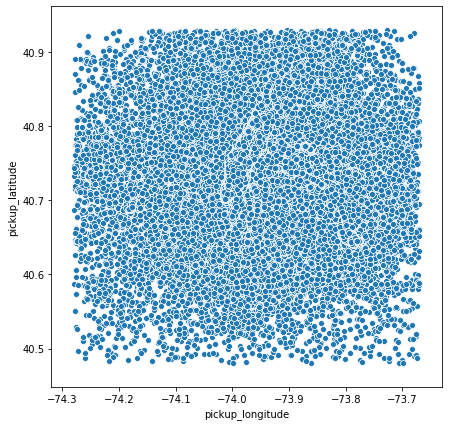

In [8]:
# 필터링 후 재플랏
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x="pickup_longitude", y="pickup_latitude")



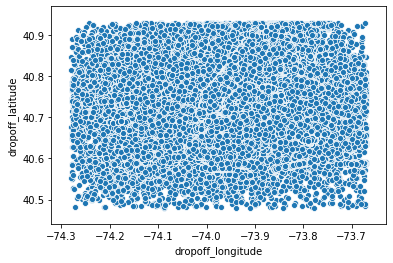

In [9]:
#하차 좌표

sns.scatterplot(data=df, x="dropoff_longitude", y="dropoff_latitude")

In [17]:
df

,index,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,0,4.5,2009-06-15 17:26:00+00:00,-73.844315,40.721317,-73.841610,40.712276
1,3,7.7,2012-04-21 04:30:00+00:00,-73.987130,40.733143,-73.991570,40.758090
2,6,7.5,2012-11-20 20:35:00+00:00,-73.980000,40.751663,-73.973800,40.764843
3,9,8.9,2009-09-02 01:11:00+00:00,-73.980660,40.733870,-73.991540,40.758137
4,12,4.1,2009-11-06 01:04:00+00:00,-73.991600,40.744713,-73.983080,40.744682
...,...,...,...,...,...,...,...
18408274,55423842,16.5,2014-09-22 09:00:00+00:00,-73.977880,40.763550,-73.974020,40.743170
18408275,55423845,5.3,2009-06-03 20:16:00+00:00,-73.976190,40.748318,-73.979680,40.757660
18408276,55423848,6.0,2013-05-24 00:13:00+00:00,-73.993484,40.747370,-73.998436,40.730460
18408277,55423851,14.0,2014-03-15 03:28:00+00:00,-74.005270,40.740030,-73.963280,40.762554


In [13]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], utc=True, format='%Y-%m-%d %H:%M')

In [14]:
# 2. 날짜 데이터 변환
df["year"] = df["pickup_datetime"].apply(lambda x : x.year)
df["month"] = df["pickup_datetime"].apply(lambda x : x.month)
df["day"] = df["pickup_datetime"].apply(lambda x : x.day)
df["hour"] = df["pickup_datetime"].apply(lambda x : x.hour)
# df["minute"] = df["pickup_datetime"].apply(lambda x : x.minute)
df

,index,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,year,month,day,hour
2,2,5.7,2011-08-18 00:35:00+00:00,-73.982735,40.761269,-73.991241,40.750561,2011,8,18,0
5,5,12.1,2011-01-06 09:50:00+00:00,-74.000961,40.731628,-73.972893,40.758232,2011,1,6,9
8,8,9.0,2012-12-03 13:10:00+00:00,-74.006462,40.726711,-73.993080,40.731628,2012,12,3,13
14,14,7.7,2011-04-05 17:11:00+00:00,-74.001823,40.737549,-73.998062,40.722790,2011,4,5,17
17,17,5.3,2009-07-22 16:08:00+00:00,-73.981056,40.737690,-73.994179,40.728413,2009,7,22,16
...,...,...,...,...,...,...,...,...,...,...,...
55224610,55423841,6.5,2014-05-02 07:36:00+00:00,-73.989769,40.739101,-73.986870,40.751652,2014,5,2,7
55224613,55423844,18.0,2015-06-13 20:45:00+00:00,-73.987335,40.755325,-74.015221,40.710213,2015,6,13,20
55224616,55423847,6.1,2011-09-16 00:46:00+00:00,-73.990944,40.736618,-73.992294,40.740314,2011,9,16,0
55224619,55423850,4.5,2015-03-22 16:37:00+00:00,-73.981056,40.737457,-73.985474,40.729298,2015,3,22,16


In [21]:
# 데이터 확인
df.describe()

,index,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,year,month,day,hour
count,1.800045e+07,1.800045e+07,1.800045e+07,1.800045e+07,1.800045e+07,1.800045e+07,1.800045e+07,1.800045e+07,1.800045e+07,1.800045e+07
mean,2.771317e+07,1.130141e+01,-7.397547e+01,4.075085e+01,-7.397461e+01,4.075120e+01,2.011739e+03,6.269544e+00,1.571037e+01,1.351140e+01
std,1.599986e+07,2.419644e+01,3.455789e-02,2.692809e-02,3.400539e-02,3.076855e-02,1.865394e+00,3.437154e+00,8.685507e+00,6.516779e+00
min,0.000000e+00,1.000000e-02,-7.427998e+01,4.048027e+01,-7.427996e+01,4.048019e+01,2.009000e+03,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.385703e+07,6.000000e+00,-7.399228e+01,4.073657e+01,-7.399159e+01,4.073557e+01,2.010000e+03,3.000000e+00,8.000000e+00,9.000000e+00
50%,2.771402e+07,8.500000e+00,-7.398210e+01,4.075337e+01,-7.398061e+01,4.075385e+01,2.012000e+03,6.000000e+00,1.600000e+01,1.400000e+01
75%,4.156899e+07,1.250000e+01,-7.396834e+01,4.076752e+01,-7.396541e+01,4.076837e+01,2.013000e+03,9.000000e+00,2.300000e+01,1.900000e+01
max,5.542385e+07,9.396336e+04,-7.367013e+01,4.092998e+01,-7.367001e+01,4.093000e+01,2.015000e+03,1.200000e+01,3.100000e+01,2.300000e+01


In [15]:
df["distance"] = np.sqrt((df['pickup_longitude']-df['dropoff_longitude'])**2+(df['pickup_latitude']-df['dropoff_latitude'])**2)

In [43]:
df

,index,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,year,month,day,hour,distance
0,0,4.5,2009-06-15 17:26:00+00:00,-73.844315,40.721317,-73.841610,40.712276,2009,6,15,17,0.009437
1,3,7.7,2012-04-21 04:30:00+00:00,-73.987130,40.733143,-73.991570,40.758090,2012,4,21,4,0.025339
2,6,7.5,2012-11-20 20:35:00+00:00,-73.980000,40.751663,-73.973800,40.764843,2012,11,20,20,0.014565
3,9,8.9,2009-09-02 01:11:00+00:00,-73.980660,40.733870,-73.991540,40.758137,2009,9,2,1,0.026594
4,12,4.1,2009-11-06 01:04:00+00:00,-73.991600,40.744713,-73.983080,40.744682,2009,11,6,1,0.008520
...,...,...,...,...,...,...,...,...,...,...,...,...
18408274,55423842,16.5,2014-09-22 09:00:00+00:00,-73.977880,40.763550,-73.974020,40.743170,2014,9,22,9,0.020742
18408275,55423845,5.3,2009-06-03 20:16:00+00:00,-73.976190,40.748318,-73.979680,40.757660,2009,6,3,20,0.009973
18408276,55423848,6.0,2013-05-24 00:13:00+00:00,-73.993484,40.747370,-73.998436,40.730460,2013,5,24,0,0.017620
18408277,55423851,14.0,2014-03-15 03:28:00+00:00,-74.005270,40.740030,-73.963280,40.762554,2014,3,15,3,0.047650


In [29]:
import bz2
import pickle
import _pickle as cPickle
# Saves the "data" with the "title" and adds the .pickle
def full_pickle(title, data):
    pikd = open(title+'.pickle', 'wb')
    pickle.dump(data, pikd)
    pikd.close()
full_pickle('qwer', df)

In [16]:
# 압축 저장
def compressed_pickle(title, data):
    with bz2.BZ2File(title+'.pbz2', 'w') as f:
        cPickle.dump(data, f)
# 파일명과, 저장을 원하는 데이터
compressed_pickle('texi_train/train3', df)

In [32]:
# 다시 불러오기
def decompress_pickle(file):
    data = bz2.BZ2File(file, 'rb')
    data = cPickle.load(data)
    return data
data = decompress_pickle('excp.pbz2')

In [33]:
data

,index,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,year,month,day,hour
0,0,4.5,2009-06-15 17:26:00+00:00,-73.844315,40.721317,-73.841610,40.712276,2009,6,15,17
1,3,7.7,2012-04-21 04:30:00+00:00,-73.987130,40.733143,-73.991570,40.758090,2012,4,21,4
2,6,7.5,2012-11-20 20:35:00+00:00,-73.980000,40.751663,-73.973800,40.764843,2012,11,20,20
3,9,8.9,2009-09-02 01:11:00+00:00,-73.980660,40.733870,-73.991540,40.758137,2009,9,2,1
4,12,4.1,2009-11-06 01:04:00+00:00,-73.991600,40.744713,-73.983080,40.744682,2009,11,6,1
...,...,...,...,...,...,...,...,...,...,...,...
18408274,55423842,16.5,2014-09-22 09:00:00+00:00,-73.977880,40.763550,-73.974020,40.743170,2014,9,22,9
18408275,55423845,5.3,2009-06-03 20:16:00+00:00,-73.976190,40.748318,-73.979680,40.757660,2009,6,3,20
18408276,55423848,6.0,2013-05-24 00:13:00+00:00,-73.993484,40.747370,-73.998436,40.730460,2013,5,24,0
18408277,55423851,14.0,2014-03-15 03:28:00+00:00,-74.005270,40.740030,-73.963280,40.762554,2014,3,15,3


In [34]:
del data